# tgextract2

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


---
# Download

In [2]:
/bin/rm -rf 29
download_chandra_obsid 29 evt2
mv -fv 29/primary/*evt2.fits.gz .
gunzip -f *fits.gz


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits      170 Mb  ####################            2 s  97966.2 kb/s

'29/primary/hrcf00029N006_evt2.fits.gz' -> './hrcf00029N006_evt2.fits.gz'


In [3]:
calquiz hrcf00029N006_evt2.fits product=TGMASK2 cal=CALDB echo+

/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/tgmask2/letgD1999-07-22regN0002.fits[2]


In [4]:
pget calquiz outfile | sed 's,\.fits.*,.fits,' | xargs -I@ cp -fv @ ./

'/export/CIAOT/ciaot_install/20211019/ciao-4.14/CALDB/data/chandra/hrc/tgmask2/letgD1999-07-22regN0002.fits' -> './letgD1999-07-22regN0002.fits'


[1] 44774
[1]+  Done                    ds9 hrcf00029N006_evt2.fits -regions delete all -zoom 1 -scale log -pan to $x $y physical -saveimage png ds9_01.png


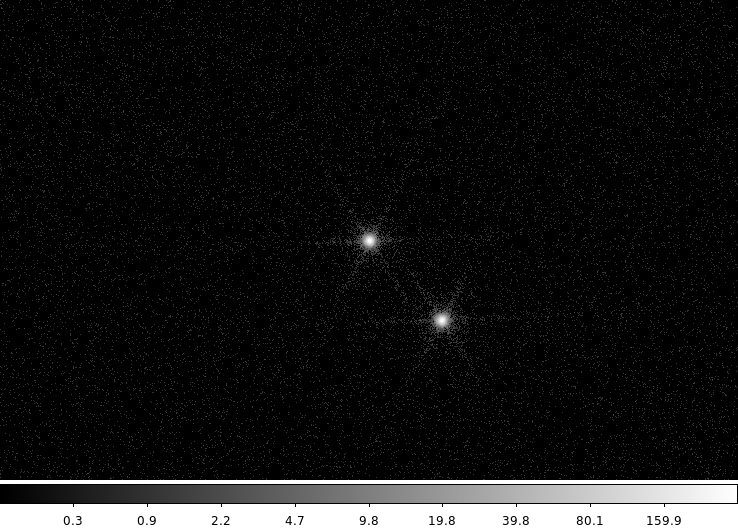

In [5]:
x=`dmkeypar hrcf00029N006_evt2.fits"[region]" x echo+`
y=`dmkeypar hrcf00029N006_evt2.fits"[region]" y echo+`

ds9 hrcf00029N006_evt2.fits -regions delete all \
  -zoom 1 -scale log \
  -pan to $x $y physical \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

In [6]:
dmcopy hrcf00029N006_evt2.fits"[bin tg_r=-2:2:0.002,tg_d=-0.2:0.2:0.00015][opt mem=200]" tgd.fits clob+

[1] 44822
[1]+  Done                    ds9 tgd.fits -scale log -saveimage png ds9_02.png


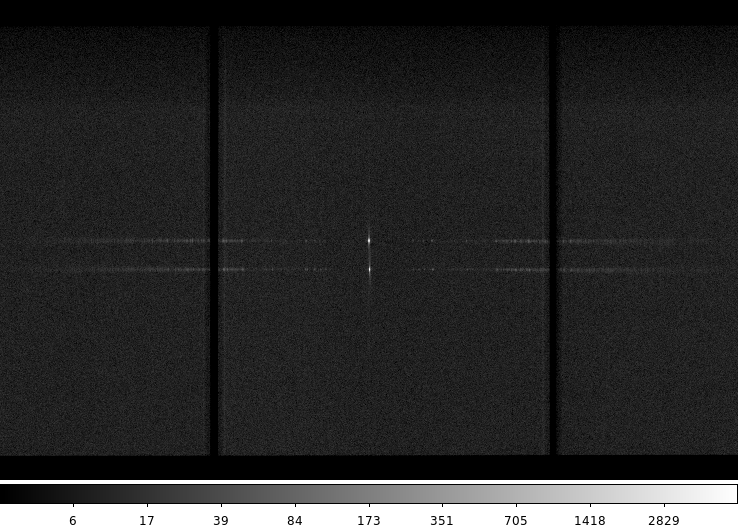

In [7]:
ds9 tgd.fits -scale log \
    -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

In [8]:
tgmask2reg infile= letgD1999-07-22regN0002.fits outfile=tg.reg clob+

In [9]:
cat tg.reg

# Region file format: DS9 version 4.1
# Filename:
global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=0 include=1 source=1
physical
polygon(-0.005780399776995182,0.0005310000269673765,-0.2986699938774109,0.0005310000269673765,-1.1548999547958374,0.002114000031724572,-1.1548999547958374,-0.002114000031724572,-0.2986699938774109,-0.0005310000269673765,-0.005780399776995182,-0.0005310000269673765,-0.005780399776995182,0.0005310000269673765) # tag={row_idx=1} tag={rowid=SOURCE} tag={tg_part=3} tag={tg_srcid=1} tag={tg_m=-1} tag={backscal=1.0}
polygon(-0.005780399776995182,0.007309999782592058,-0.2986699938774109,0.007309999782592058,-1.1548999547958374,0.02314000017940998,-1.1548999547958374,0.0020000000949949026,-0.2986699938774109,0.0020000000949949026,-0.005780399776995182,0.0020000000949949026,-0.005780399776995182,0.007309999782592058) # tag={row_idx=2} tag={rowid=BACKGROUND_UP} tag={tg_part=3} tag={tg_srcid=

[1] 44904
[1]+  Done                    ds9 tgd.fits -scale log -region tg.reg -saveimage png ds9_03.png


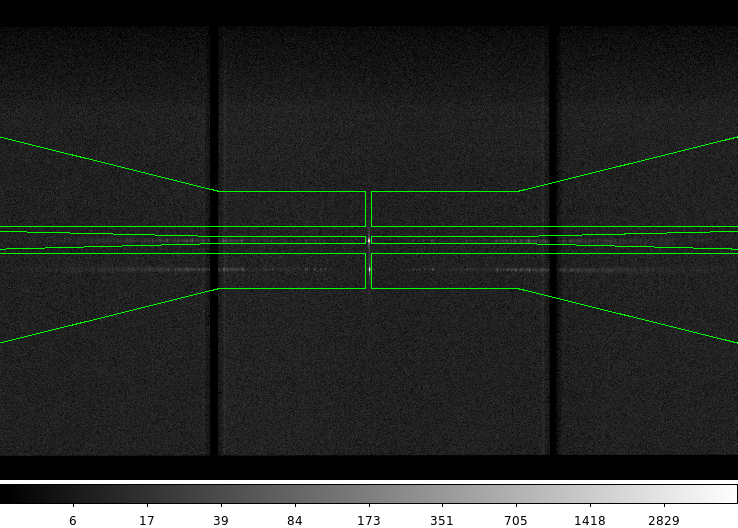

In [10]:
ds9 tgd.fits -scale log \
    -region tg.reg \
    -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png

In [11]:
cat << EOM > hack.py
from pycrates import read_file
tab=read_file("letgD1999-07-22regN0002.fits") 
tg_d=tab.get_column('tg_d').values
tg_d[2][:]=tg_d[2][:]-0.005
tg_d[5][:]=tg_d[5][:]-0.005
tab.write("modified_tgmask2.fits",clobber=True)
EOM

python hack.py




In [12]:
tgmask2reg infile= modified_tgmask2.fits outfile=tg_modified.reg clob+

[1] 44950
[1]+  Done                    ds9 tgd.fits -scale log -region tg_modified.reg -saveimage png ds9_04.png


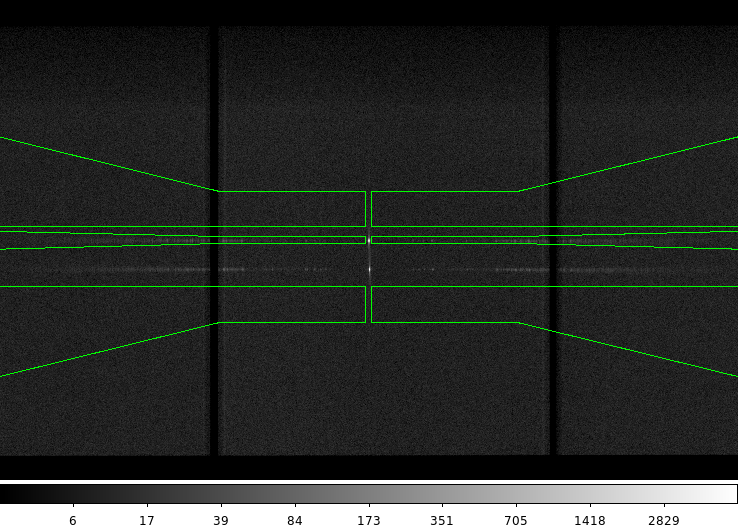

In [13]:
ds9 tgd.fits -scale log \
    -region tg_modified.reg \
    -saveimage png ds9_04.png &
sleep 10
xpaset -p ds9 quit

display < ds9_04.png

In [14]:
reg2tgmask infile=tg_modified.reg srcfile=CALDB out=tg_mask.fits clob+

## Run tgexract2


In [15]:
pset tgextract2 infile=hrcf00029N006_evt2.fits
pset tgextract2 outfile=a_ 
pset tgextract2 region_file=tg_mask.fits
pset tgextract2 opt=pha1
tgextract2 mode=h clobber=yes

In [16]:
dmcopy 'a_01Lm1_pha2.fits[cols CHANNEL,BIN_LO,BIN_HI,COUNTS=bg_counts,BACKSCAL=bg_area]' a_01Lm1_pha2_bg.fits clob+

In [17]:
dmcopy 'a_01Lp1_pha2.fits[cols CHANNEL,BIN_LO,BIN_HI,COUNTS=bg_counts,BACKSCAL=bg_area]' a_01Lp1_pha2_bg.fits clob+

In [18]:
ls a_*

a_01Lm1_pha2.fits     a_01Lp1_pha2.fits
a_01Lm1_pha2_bg.fits  a_01Lp1_pha2_bg.fits


### Sherpa


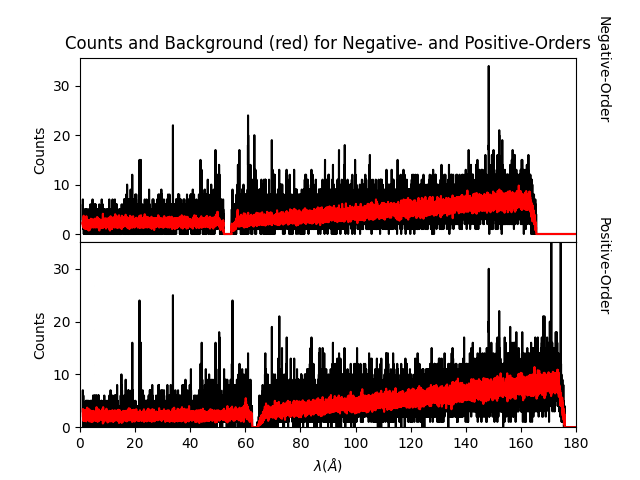

In [19]:
cat << EOM > s1.py
from sherpa.astro.ui import *
import matplotlib.pylab as plt

load_pha(1,"a_01Lm1_pha2.fits")
load_pha(2,"a_01Lp1_pha2.fits")
load_bkg(1,"a_01Lm1_pha2_bg.fits")
load_bkg(2,"a_01Lp1_pha2_bg.fits")
set_analysis("wave",type="counts")

ax1 = plt.subplot(2,1,1)
plt.subplots_adjust(hspace=0.0 )
plt.plot(get_data_plot(1).x,get_data_plot(1).y, marker="None", color="black")

bs1=get_bkg_scale(1)
ct1=get_counts(1,bkg_id=1)
plt.plot(get_data_plot(1).x,(ct1*bs1),marker="None", color="red")

plt.ylabel("Counts") 
plt.figtext(0.93,0.75,"Negative-Order",rotation=270)
plt.title('Counts and Background (red) for Negative- and Positive-Orders')
plt.xlim(0, 180)
plt.gca().set_xticks([]) # hide x-ticks

plt.subplot(2,1,2)
plt.plot(get_data_plot(2).x,get_data_plot(2).y, marker="None",color="black")

bs2=get_bkg_scale(2)
ct2=get_counts(2,bkg_id=1) # 1st (only) background associated with dataset 2
plt.plot(get_data_plot(2).x,(ct2*bs2),marker="None", color="red")

plt.xlabel(r"$\lambda (\AA)$")
plt.ylabel("Counts")
plt.figtext(0.93,0.35,"Positive-Order",rotation=270)
plt.xlim(0, 180)
plt.ylim(0,35)
plt.savefig("letgs_spec_bg.png")

EOM

python s1.py
display < letgs_spec_bg.png

## Check tg_lam space

In [20]:
dmcopy hrcf00029N006_evt2.fits"[bin tg_lam=0:400:0.15,tg_d=-0.2:0.2:0.00015]" tgld.fits clob+

[1] 45082
[1]+  Done                    ds9 tgld.fits -scale log -pan to 50 0 physical -region tgld.reg -saveimage png ds9_05.png


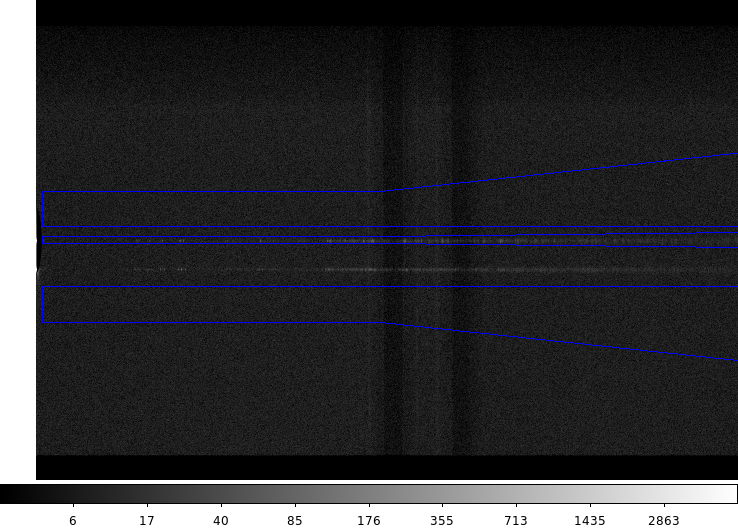

In [21]:
dmmakereg region="region(a_01Lp1_pha2.fits[REGION])" out=tgld.reg clob+ ker=ascii

ds9 tgld.fits -scale log \
  -pan to 50 0 physical \
  -region tgld.reg \
  -saveimage png ds9_05.png &
sleep 10
xpaset -p ds9 quit

display < ds9_05.png

In [22]:
/bin/rm -rf 29
/bin/rm -f hrcf*